#### regression1_linear      p.162

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus']=False  # 解決 plot 負號不能顯示問題
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']   # 解決 plot 中文不能顯示問題

In [2]:
# 讀入資料
train = np.loadtxt('click.csv', delimiter=',', skiprows=1)
print(train)

[[235. 591.]
 [216. 539.]
 [148. 413.]
 [ 35. 310.]
 [ 85. 308.]
 [204. 519.]
 [ 49. 325.]
 [ 25. 332.]
 [173. 498.]
 [191. 498.]
 [134. 392.]
 [ 99. 334.]
 [117. 385.]
 [112. 387.]
 [162. 425.]
 [272. 659.]
 [159. 400.]
 [159. 427.]
 [ 59. 319.]
 [198. 522.]]


In [3]:
train_x = train[:, 0]  # 第 0 行，取全部  -- x 軸（廣告費）


In [4]:
print(train_x)

[235. 216. 148.  35.  85. 204.  49.  25. 173. 191. 134.  99. 117. 112.
 162. 272. 159. 159.  59. 198.]


In [5]:
train_y = train[:, 1]  # 第 1 行，取全部  -- y 軸（點擊數）

In [6]:
print(train_y)

[591. 539. 413. 310. 308. 519. 325. 332. 498. 498. 392. 334. 385. 387.
 425. 659. 400. 427. 319. 522.]


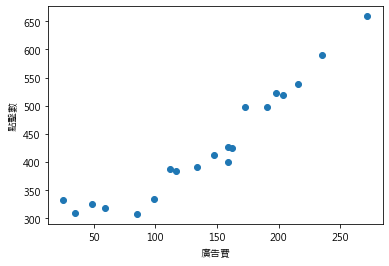

In [7]:
# 畫圖
plt.plot(train_x, train_y, 'o')
plt.xlabel('廣告費')
plt.ylabel('點擊數')
plt.show()

### 預測函數(p.30)： $$f_\theta(x) = \theta_0 + \theta_1x $$

###      $$ \theta_0：截距 \;\;\; \theta_1：斜率  $$

###  目標函數(p.33) -- 最小平方法： $$E(\theta) = \frac{1}{2}\sum_{i=1}^n{\left({y^{(i)} - f_\theta(x^{(i)}) }\right)}^2   $$

In [8]:
# 初始化參數
theta0 = np.random.rand()
theta1 = np.random.rand()

In [9]:
print(theta0)

0.46271014914097897


In [10]:
print(theta1)

0.7980764923628401


In [11]:
# 預測函數
def f(x):
    return theta0 + theta1 * x

# 目標函數
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

### 標準化或 Z-score 正規化  $$ z^{(i)} = \frac{x^{(i)} - \mu}{\sigma} $$

In [12]:
# 標準化
mu = train_x.mean()    # 平均數
sigma = train_x.std()  # 標準差

In [13]:
print(mu)

141.6


In [14]:
print(sigma)

66.98537153737374


In [15]:
def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)  # 將 X 軸（廣告費）標準化
print(train_z)

[ 1.39433428  1.11069026  0.09554325 -1.59139223 -0.8449606   0.93154667
 -1.38239138 -1.74067856  0.46875906  0.73747445 -0.11345761 -0.63595975
 -0.36724436 -0.44188752  0.3045441   1.94669369  0.25975821  0.25975821
 -1.23310505  0.84197488]


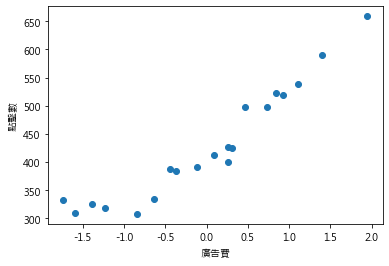

In [16]:
plt.plot(train_z, train_y, 'o')
plt.xlabel('廣告費')
plt.ylabel('點擊數')
plt.show()

# 標準化後，x 軸的刻度變小了

### $$ \theta_0 := \theta_0 - \eta\sum_{i=1}^n{\left(f_\theta(x^{(i)}) - {y^{(i)}}\right)}  $$

### $$ \theta_1 := \theta_1 - \eta\sum_{i=1}^n{\left(f_\theta(x^{(i)}) - {y^{(i)}}\right)}x^{(i)} $$

In [17]:
# 學習率，自己設
ETA = 1e-3

# 誤差的差分
diff = 1

# 更新次數
count = 0

error = E(train_z, train_y)  # 目標函數

# 重複參數的更新，直到誤差的差分變成 0.01 以下為止
while diff > 1e-2:
    # 將更新結果儲存於臨時變數
    tmp_theta0 = theta0 - ETA * np.sum((f(train_z) - train_y))
    tmp_theta1 = theta1 - ETA * np.sum((f(train_z) - train_y) * train_z)
    
    # 更新參數
    theta0 = tmp_theta0
    theta1 = tmp_theta1
    
    # 計算與前一項誤差的差分
    current_error = E(train_z, train_y)
    diff = error - current_error
    error = current_error
    
    # 輸出日誌
    count += 1
    log = '{}次: theta0 = {:.3f}, theta1 = {:.3f}, 差分 = {:.4f}'
    print(log.format(count, theta0, theta1, diff))


1次: theta0 = 9.036, theta1 = 2.652, 差分 = 76175.5512
2次: theta0 = 17.439, theta1 = 4.468, 差分 = 73158.9994
3次: theta0 = 25.673, theta1 = 6.248, 差分 = 70261.9030
4次: theta0 = 33.742, theta1 = 7.993, 差分 = 67479.5316
5次: theta0 = 41.651, theta1 = 9.703, 差分 = 64807.3422
6次: theta0 = 49.401, theta1 = 11.378, 差分 = 62240.9714
7次: theta0 = 56.996, theta1 = 13.020, 差分 = 59776.2290
8次: theta0 = 64.439, theta1 = 14.629, 差分 = 57409.0903
9次: theta0 = 71.733, theta1 = 16.206, 差分 = 55135.6903
10次: theta0 = 78.881, theta1 = 17.752, 差分 = 52952.3170
11次: theta0 = 85.887, theta1 = 19.266, 差分 = 50855.4052
12次: theta0 = 92.752, theta1 = 20.751, 差分 = 48841.5312
13次: theta0 = 99.480, theta1 = 22.205, 差分 = 46907.4066
14次: theta0 = 106.073, theta1 = 23.631, 差分 = 45049.8733
15次: theta0 = 112.535, theta1 = 25.028, 差分 = 43265.8983
16次: theta0 = 118.867, theta1 = 26.397, 差分 = 41552.5687
17次: theta0 = 125.073, theta1 = 27.738, 差分 = 39907.0870
18次: theta0 = 131.154, theta1 = 29.053, 差分 = 38326.7663
19次: theta0 = 137.11

In [18]:
# 繪圖來確認
x = np.linspace(-3, 3, 100)
print(x)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

In [19]:
print(f(x))   # f(x) = theta0 + theta1 * x

[148.66109098 154.32450939 159.98792781 165.65134623 171.31476464
 176.97818306 182.64160147 188.30501989 193.9684383  199.63185672
 205.29527513 210.95869355 216.62211196 222.28553038 227.94894879
 233.61236721 239.27578563 244.93920404 250.60262246 256.26604087
 261.92945929 267.5928777  273.25629612 278.91971453 284.58313295
 290.24655136 295.90996978 301.57338819 307.23680661 312.90022503
 318.56364344 324.22706186 329.89048027 335.55389869 341.2173171
 346.88073552 352.54415393 358.20757235 363.87099076 369.53440918
 375.19782759 380.86124601 386.52466443 392.18808284 397.85150126
 403.51491967 409.17833809 414.8417565  420.50517492 426.16859333
 431.83201175 437.49543016 443.15884858 448.82226699 454.48568541
 460.14910382 465.81252224 471.47594066 477.13935907 482.80277749
 488.4661959  494.12961432 499.79303273 505.45645115 511.11986956
 516.78328798 522.44670639 528.11012481 533.77354322 539.43696164
 545.10038006 550.76379847 556.42721689 562.0906353  567.75405372
 573.417472

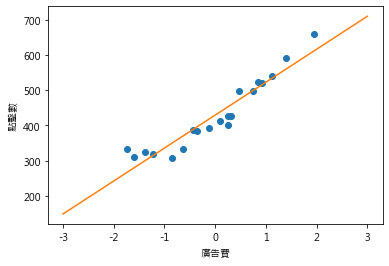

In [20]:
plt.plot(train_z, train_y, 'o')  # 點 
plt.plot(x, f(x))  # 直線
plt.xlabel('廣告費')
plt.ylabel('點擊數')
plt.show()

In [21]:
f(standardize(100))

370.96717812700274

In [22]:
f(standardize(200))

510.46988104397354

In [23]:
f(standardize(300))

649.9725839609443

### 多項式迴歸的程式    p.165

### $$f_\theta(x) = \theta_0 + \theta_1x + \theta_2x^2 $$

In [24]:
# 初始化參數
theta = np.random.rand(3)
print(theta)

[0.73791405 0.43304812 0.94936131]


In [25]:
print(train_z)

[ 1.39433428  1.11069026  0.09554325 -1.59139223 -0.8449606   0.93154667
 -1.38239138 -1.74067856  0.46875906  0.73747445 -0.11345761 -0.63595975
 -0.36724436 -0.44188752  0.3045441   1.94669369  0.25975821  0.25975821
 -1.23310505  0.84197488]


In [26]:
print(train_z.shape[0])

20


In [27]:
# 建立學習資料的矩陣
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]), x, x ** 2]).T

X = to_matrix(train_z)
print(X)

[[ 1.          1.39433428  1.94416809]
 [ 1.          1.11069026  1.23363286]
 [ 1.          0.09554325  0.00912851]
 [ 1.         -1.59139223  2.53252924]
 [ 1.         -0.8449606   0.71395842]
 [ 1.          0.93154667  0.8677792 ]
 [ 1.         -1.38239138  1.91100592]
 [ 1.         -1.74067856  3.02996185]
 [ 1.          0.46875906  0.21973506]
 [ 1.          0.73747445  0.54386856]
 [ 1.         -0.11345761  0.01287263]
 [ 1.         -0.63595975  0.4044448 ]
 [ 1.         -0.36724436  0.13486842]
 [ 1.         -0.44188752  0.19526458]
 [ 1.          0.3045441   0.09274711]
 [ 1.          1.94669369  3.78961632]
 [ 1.          0.25975821  0.06747433]
 [ 1.          0.25975821  0.06747433]
 [ 1.         -1.23310505  1.52054807]
 [ 1.          0.84197488  0.70892169]]


### $$\theta^Tx = \theta_0x_0 + \theta_1x_1 + \theta_2x_2 + .... + \theta_nx_n  $$

### $$f_\theta(x) = \theta^Tx $$

In [28]:
# 預測函數
def f(x):
    return np.dot(x, theta)

In [29]:
# 誤差的差分
diff = 1

# 重複學習
error = E(X, train_y)  # 目標函數

# 重複參數的更新，直到誤差的差分變成 0.01 以下為止
while diff > 1e-2:
    # 更新參數
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    # 計算與前一項誤差的差分
    current_error = E(X, train_y)  # 
    diff = error - current_error
    error = current_error

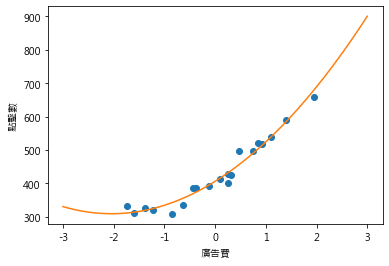

In [30]:
x = np.linspace(-3, 3, 100)

plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.xlabel('廣告費')
plt.ylabel('點擊數')
plt.show()

### 均方誤差     p.170

### $$ \frac{1}{n}\sum_{i=1}^n{\left({y^{(i)} - f_\theta(x^{(i)}) }\right)}^2   $$

### 測試資料有 n 筆，$y^{(i)}$ 為點擊數， $x^{(i)}$ 為廣告費


In [31]:
# 均方誤差
def MSE(x, y):
    return (1 / x.shape[0]) * np.sum((y - f(x)) ** 2)

In [32]:
# 將參數以隨機方式初始化
theta = np.random.rand(3)
print(theta)

[0.77924097 0.33253158 0.3775301 ]


In [33]:
# 均方誤差的歷史記錄
errors = []

In [34]:
# 誤差的差分
diff = 1

In [35]:
# 重複學習
errors.append(MSE(X, train_y))

# 重複參數的更新，直到誤差的差分變成 0.01 以下為止
while diff > 1e-2:
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    errors.append(MSE(X, train_y))
    diff = errors[-2] - errors[-1]
    

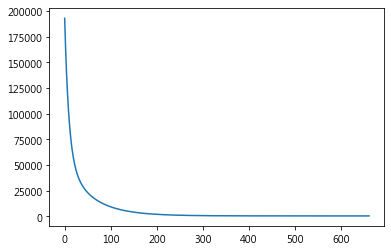

In [36]:
# 繪製誤差
x = np.arange(len(errors))

plt.plot(x, errors)
plt.show()

### 隨機梯度下降法  p.171

### $$ \theta_j := \theta_j - \eta{\left(f_\theta(x^{(k)}) - {y^{(k)}}\right)}x_j^{(k)} $$

In [37]:
# 將參數以隨機方式初始化
theta = np.random.rand(3)

In [38]:
# 均方誤差的歷史記錄
errors = []

In [39]:
# 誤差的差分
diff = 1

In [40]:
# 重複學習
errors.append(MSE(X, train_y))

# 重複參數的更新，直到誤差的差分變成 0.01 以下為止
while diff > 1e-2:
    # 準備排列學習資料所需的隨機排列組合
    p = np.random.permutation(X.shape[0])
    # 將學習資料以隨機的方式取出並以隨機梯度下降法來更新參數
    for x, y in zip(X[p,:], train_y[p]):
        theta = theta - ETA * (f(x) - y) * x
    # 計算與前一項誤差的差分
    errors.append(MSE(X, train_y))
    diff = errors[-2] - errors[-1]

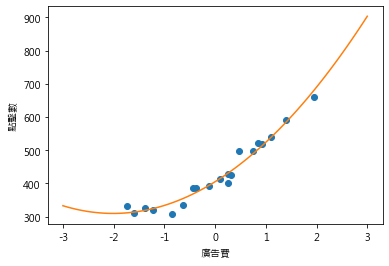

In [41]:
x = np.linspace(-3, 3, 100)

plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.xlabel('廣告費')
plt.ylabel('點擊數')
plt.show()

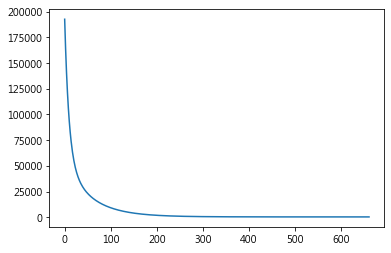

In [42]:
# 繪製誤差
x = np.arange(len(errors))

plt.plot(x, errors)
plt.show()